<a href="https://colab.research.google.com/github/kuldeepit/Chess-Prediciton-Model-1/blob/main/cocdc99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Step 2: Load Your Dataset
%cd /content/drive/MyDrive/games.csv
data = pd.read_csv('games.csv')

/content/drive/MyDrive/games.csv


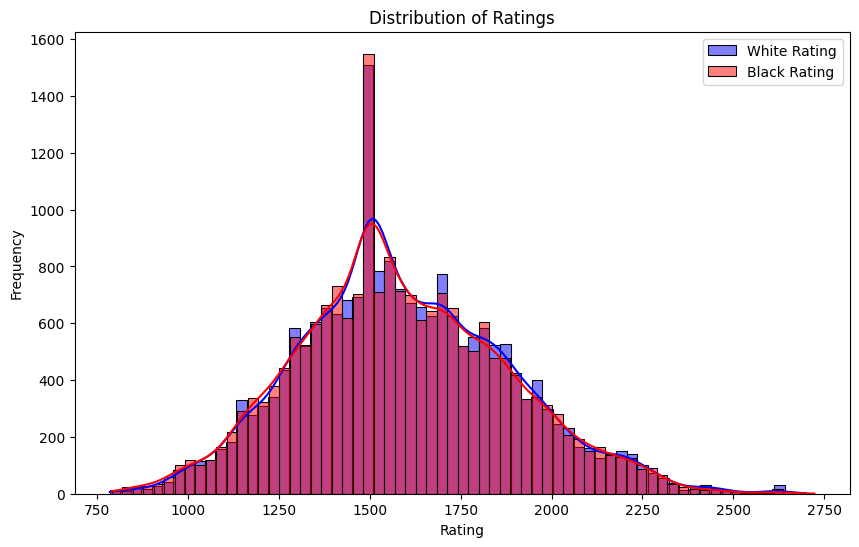

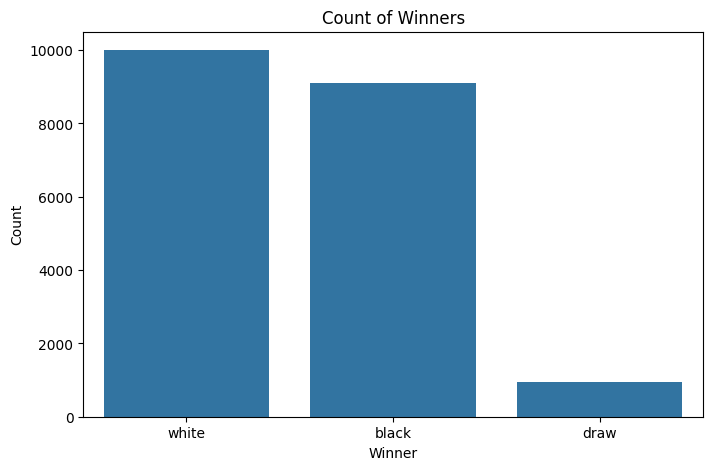

In [ ]:
# Step 3: Exploratory Data Analysis and Visualization
# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['white_rating'], color='blue', kde=True, label='White Rating')
sns.histplot(data['black_rating'], color='red', kde=True, label='Black Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize the counts of winners
plt.figure(figsize=(8, 5))
sns.countplot(x='winner', data=data)
plt.title('Count of Winners')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()

In [ ]:
# Step 4: Extract Features for Clustering
# One-hot encode the 'opening_eco' feature
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
opening_eco_encoded = onehot_encoder.fit_transform(data[['opening_eco']])

# Standardize the numerical features
scaler_for_clustering = StandardScaler()
features_for_clustering = data[['white_rating', 'black_rating']]
features_for_clustering_scaled = scaler_for_clustering.fit_transform(features_for_clustering)

# Combine the standardized numerical features with the one-hot encoded 'opening_eco' feature
features_combined = pd.concat([pd.DataFrame(features_for_clustering_scaled, columns=['white_rating', 'black_rating']), pd.DataFrame(opening_eco_encoded, columns=onehot_encoder.get_feature_names_out(['opening_eco']))], axis=1)


In [ ]:
# Step 5: Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(features_combined)

# Add cluster labels as an extra feature to the dataset
data['cluster_labels'] = cluster_labels

In [ ]:
# Step 6: Prepare Data for Prediction Model

X = data.drop(['winner', 'victory_status'], axis=1)
y = data['winner']

In [ ]:
# Step 7: Split the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 8: Build and Train a Prediction Model
# Drop non-numeric columns and 'winner' from X_train and X_test
X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')

# Build and train the model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# Make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6530408773678963
Classification Report:
              precision    recall  f1-score   support

       black       0.65      0.62      0.63      1816
        draw       0.83      0.08      0.14       192
       white       0.66      0.74      0.69      2004

    accuracy                           0.65      4012
   macro avg       0.71      0.48      0.49      4012
weighted avg       0.66      0.65      0.64      4012

